<a href="https://colab.research.google.com/github/labrijisaad/Git-Clustering/blob/main/notebooks/Acuracy Benchmark/GIT Accuracy Benchmark - Large Scale Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/labrijisaad/Git-Clustering/blob/main/notebooks/Acuracy Benchmark/GIT Accuracy Benchmark - Large Scale Datasets.ipynb" target="_blank">
  <img src="https://img.shields.io/badge/Open%20in-GitHub-blue.svg" alt="Open In GitHub"/>
</a>

## <center><a><span style="color:blue">`Evaluating GIT` - Accuracy Benchmarking on Large-Scale Datasets</span></a></center>

#### Objective

The goal of this notebook is to benchmark the GIT clustering algorithm against other standard clustering algorithms using four classic **Large-scale datasets** (Face, FMNIST, MNIST and Codon). We aim to evaluate the accuracy and performance of GIT in a controlled, comparative study.

In this benchmarking study, we will compare the GIT clustering algorithm with the following clustering techniques:

- HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
- Spectral Clustering
- K-Means
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Agglomerative Clustering
- Gaussian Mixture Models (GMM)

#### Install the `packages` & Prepare the `data` ( Install this if needed )

In [1]:
# !pip install -i "https://test.pypi.org/simple/" git_cluster > /dev/null 
# !pip install hdbscan > /dev/null
# !pip install -U gdown > /dev/null
# !gdown 1yNwCStP3Sdf2lfvNe9h0WIZw2OQ3O2UP && unzip datasets.zip > /dev/null

#### Import the Libraries

In [2]:
import warnings ; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import time

from utils import measures_calculator, alignPredictedWithTrueLabels, get_balanced_subset
from dataloaders import Real_DataLoader as Real_DataLoader

# Local Data Path
real_datasets_path = "../../datasets/real_datasets"

# # Google Colab Data Path
# real_datasets_path = "/content/datasets/real_datasets"

#### Note on **Clustering Performance Metrics**

##### F1 Score - **`F1`**
The F1 Score represents the harmonic mean of precision and recall. When applied to clustering, it assesses the correspondence between clusters and ground truth labels. It ranges from 0 to 1, with 1 indicating perfect precision and recall alignment.

##### Adjusted Rand Index - **`ARI`**
The ARI measures the similarity between two sets of data clusters, adjusted for chance. It offers a score that signifies whether the clustering is superior to random assignment. A value of 1 denotes a perfect match, 0 signifies random labeling, and negative values imply less agreement than expected by chance.

##### Accuracy - **`ACC`**
Accuracy in clustering is typically computed after aligning clusters with ground truth labels. It quantifies the proportion of correct predictions among the total predictions made. However, its utility is contingent upon such alignment, given that clustering doesn't inherently strive to replicate external labels.

##### Normalized Mutual Information - **`NMI`**
NMI is a modification of the Mutual Information (MI) score that considers cluster sizes and normalizes the score between 0 (no mutual information) and 1 (perfect correlation). It gauges the shared information between predicted clusters and true labels.

##### Cover Rate - **`Cover Rate`**
Cover rate usually indicates how effectively the clustering algorithm encompasses the dataset with its clusters. A cover rate of 1 indicates that each data point has been assigned to a cluster, while a value less than 1 suggests some data points remain unassigned.

##### Silhouette Score - **`Silhouette`** 
The Silhouette Score assesses cluster separation and cohesion, ranging from -1 (poor clustering) to 1 (clear, distinct clusters). It helps evaluate clustering quality without needing true labels.

## <center><a><span style="color:green">Real Datasets - `Olivetti Face`</span></a></center>

### Load the `Olivetti Face` data

In [3]:
# Load the Face dataset
X_face, Y_face_true = Real_DataLoader(name='face', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_face_true))
num_features = len(X_face[0])
total_rows = len(X_face)

# Calculate the balance rate
class_counts = Counter(Y_face_true)
smallest_class_proportion = min(class_counts.values()) / total_rows

# Print out the dataset characteristics including the balance rate
print(f"The 'face' Dataset has: {num_clusters} Classes, {num_features} Dimensions, {total_rows} Samples, and a Balance Rate of {smallest_class_proportion:.2f} per Class.")

The 'face' Dataset has: 40 Classes, 4096 Dimensions, 400 Samples, and a Balance Rate of 0.03 per Class.


### Take a small sample Face data ⚠ 

In [4]:
X_face, Y_face_true = get_balanced_subset(X_face, Y_face_true, subset_percentage=0.2)

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_face_true))
num_features = len(X_face[0])
total_rows = len(X_face)

# Print out the dataset characteristics
print(f"The 'Subset face' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'Subset face' Dataset has: 40 Clusters, 4096 Features, and 80 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [5]:
from git_cluster import GIT

In [6]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=2, target_ratio=[1 for i in range(40)])

# Apply the GIT algorithm to predict the clusters in the data
Y_face_pred_git = git.fit_predict(X_face)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_git, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_git, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_face = measures_calculator(X_face, Y_face_pred_git, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_face["Algo"] = git.__class__.__name__
perf_metrics_git_face["dataset"] = "face"
perf_metrics_git_face["TotalProcessingTime"] = processing_time

perf_metrics_git_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.37469,0.054622,0.25,0.60916,0.060575,1.0,40,GIT,face,0.432648


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [7]:
import hdbscan

In [8]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_face)

# Get the predicted Clusters
Y_face_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_hdbscan, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_hdbscan, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_face = measures_calculator(X_face, Y_face_pred_hdbscan, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_face["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_face["dataset"] = "face"
perf_metrics_hdbscan_face["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.063305,0.010489,0.0375,0.260263,0.060575,1.0,40,HDBSCAN,face,0.099151


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [9]:
from sklearn.cluster import SpectralClustering

In [10]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=40, assign_labels="discretize", 
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_face)

# Get the predicted Clusters
Y_face_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_speclustr, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_speclustr, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_face = measures_calculator(X_face, Y_face_pred_speclustr, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_face["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_face["dataset"] = "face"
perf_metrics_speclustr_face["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.665794,0.325375,0.5875,0.853577,0.060575,1.0,40,SpectralClustering,face,0.046739


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=40, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_face)

# Get the predicted Clusters
Y_face_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_kmeans, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_kmeans, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_face = measures_calculator(X_face, Y_face_pred_kmeans, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_face["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_face["dataset"] = "face"
perf_metrics_kmeans_face["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.654048,0.275088,0.65,0.85108,0.060575,1.0,40,KMeans,face,0.121128


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=30)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_face_pred_dbscan = dbscan.fit_predict(X_face)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_dbscan, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_dbscan, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_face = measures_calculator(X_face, Y_face_pred_dbscan, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_face["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_face["dataset"] = "face"
perf_metrics_dbscan_face["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.04878,0.0,0.025,0.0,0.060575,1.0,40,DBSCAN,face,0.047657


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=40, linkage='ward')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_face_pred_agg = agg_clustering.fit_predict(X_face)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_agg, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_agg, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_face = measures_calculator(X_face, Y_face_pred_agg, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_face["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_face["dataset"] = "face"
perf_metrics_agg_face["TotalProcessingTime"] = processing_time

perf_metrics_agg_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.74,0.456446,0.725,0.897768,0.060575,1.0,40,AgglomerativeClustering,face,0.013927


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=40, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_face)
Y_face_pred_gmm = gmm.predict(X_face)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_face_pred_gmm, Y_face_true = alignPredictedWithTrueLabels(Y_face_pred_gmm, Y_face_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_face = measures_calculator(X_face, Y_face_pred_gmm, Y_face_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_face["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_face["dataset"] = "face"
perf_metrics_gmm_face["TotalProcessingTime"] = processing_time

perf_metrics_gmm_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.654048,0.275088,0.65,0.85108,0.060575,1.0,40,GaussianMixture,face,419.77782


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [19]:
full_perf_metrics_face = pd.concat([perf_metrics_git_face, 
                                    perf_metrics_hdbscan_face,
                                    perf_metrics_speclustr_face,
                                    perf_metrics_kmeans_face,
                                    perf_metrics_dbscan_face,
                                    perf_metrics_agg_face,
                                    perf_metrics_gmm_face], ignore_index=True)
full_perf_metrics_face

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.374690,0.054622,0.2500,0.609160,0.060575,1.0,40,GIT,face,0.432648
1,0.063305,0.010489,0.0375,0.260263,0.060575,1.0,40,HDBSCAN,face,0.099151
2,0.665794,0.325375,0.5875,0.853577,0.060575,1.0,40,SpectralClustering,face,0.046739
3,0.654048,0.275088,0.6500,0.851080,0.060575,1.0,40,KMeans,face,0.121128
4,0.048780,0.000000,0.0250,0.000000,0.060575,1.0,40,DBSCAN,face,0.047657
5,0.740000,0.456446,0.7250,0.897768,0.060575,1.0,40,AgglomerativeClustering,face,0.013927
6,0.654048,0.275088,0.6500,0.851080,0.060575,1.0,40,GaussianMixture,face,419.777820


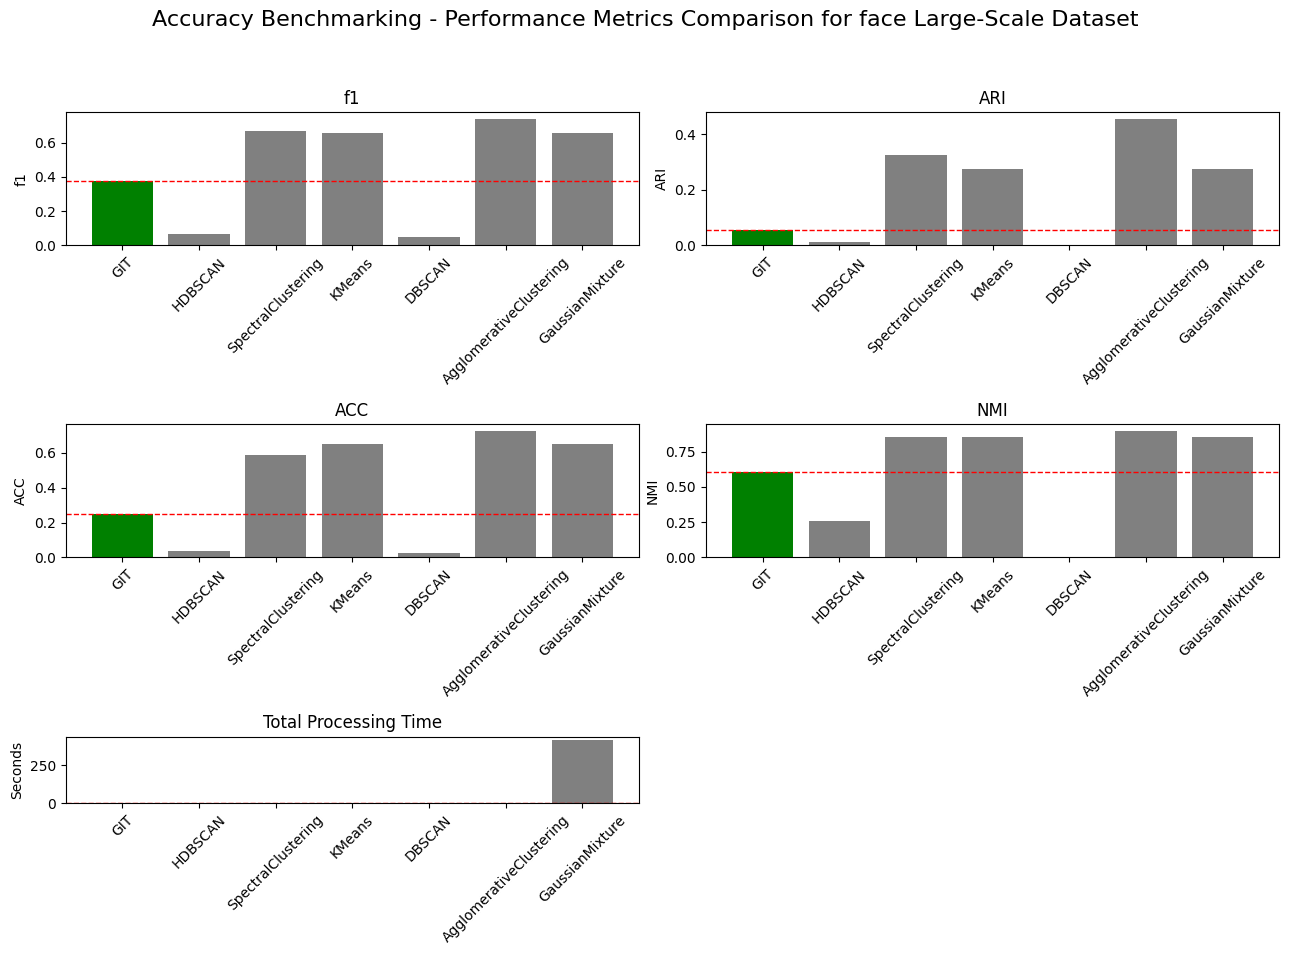

In [20]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_face['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_face[full_perf_metrics_face['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_face[full_perf_metrics_face['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_face['Algo'], full_perf_metrics_face[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_face['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_face['Algo'], full_perf_metrics_face['TotalProcessingTime'], 
            color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_face['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `FMNIST`</span></a></center>

### Load the Fmnist data

In [21]:
# Load the Face dataset
X_fmnist, Y_fmnist_true = Real_DataLoader(name='fmnist_784', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_fmnist_true))
num_features = len(X_fmnist[0])
total_rows = len(X_fmnist)

# Calculate the balance rate
class_counts = Counter(Y_fmnist_true)
smallest_class_proportion = min(class_counts.values()) / total_rows

# Print out the dataset characteristics including the balance rate
print(f"The 'fmnist' Dataset has: {num_clusters} Classes, {num_features} Dimensions, {total_rows} Samples, and a Balance Rate of {smallest_class_proportion:.2f} per Class.")

The 'fmnist' Dataset has: 10 Classes, 784 Dimensions, 60000 Samples, and a Balance Rate of 0.10 per Class.


### Take a small sample Fmnist data ⚠ 

In [22]:
X_fmnist, Y_fmnist_true = get_balanced_subset(X_fmnist, Y_fmnist_true, subset_percentage=0.1)

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_fmnist_true))
num_features = len(X_fmnist[0])
total_rows = len(X_fmnist)

# Print out the dataset characteristics
print(f"The 'Subset fmnist' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'Subset fmnist' Dataset has: 10 Clusters, 784 Features, and 6000 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [23]:
from git_cluster import GIT

In [24]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=3, target_ratio=[1 for i in range(10)])

# Apply the GIT algorithm to predict the clusters in the data
Y_fmnist_pred_git = git.fit_predict(X_fmnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_git, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_git, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_git, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_fmnist["Algo"] = git.__class__.__name__
perf_metrics_git_fmnist["dataset"] = "fmnist"
perf_metrics_git_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_git_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.590341,0.400552,0.576,0.53231,0.045781,1.0,10,GIT,fmnist,5.945549


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [25]:
import hdbscan

In [26]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_hdbscan, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_hdbscan, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_hdbscan, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_fmnist["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_fmnist["dataset"] = "fmnist"
perf_metrics_hdbscan_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.177743,0.027558,0.1155,0.103254,0.045781,1.0,10,HDBSCAN,fmnist,56.818678


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [27]:
from sklearn.cluster import SpectralClustering

In [28]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=10, assign_labels="discretize", 
                                         random_state=0, gamma=0.01, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_speclustr, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_speclustr, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_speclustr, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_fmnist["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_fmnist["dataset"] = "fmnist"
perf_metrics_speclustr_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.567449,0.3834,0.543667,0.518521,0.045781,1.0,10,SpectralClustering,fmnist,13.867276


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [29]:
from sklearn.cluster import KMeans

In [30]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=10, random_state=2021)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_fmnist)

# Get the predicted Clusters
Y_fmnist_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_kmeans, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_kmeans, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_kmeans, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_fmnist["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_fmnist["dataset"] = "fmnist"
perf_metrics_kmeans_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.445959,0.348648,0.424333,0.512123,0.045781,1.0,10,KMeans,fmnist,0.607045


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=1)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_fmnist_pred_dbscan = dbscan.fit_predict(X_fmnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_dbscan, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_dbscan, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_dbscan, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_fmnist["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_fmnist["dataset"] = "fmnist"
perf_metrics_dbscan_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.181818,0.0,0.1,0.0,0.045781,1.0,10,DBSCAN,fmnist,4.089485


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_fmnist_pred_agg = agg_clustering.fit_predict(X_fmnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_agg, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_agg, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_agg, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_fmnist["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_fmnist["dataset"] = "fmnist"
perf_metrics_agg_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_agg_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.559426,0.373054,0.544,0.539836,0.045781,1.0,10,AgglomerativeClustering,fmnist,13.122073


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [35]:
from sklearn.mixture import GaussianMixture

In [36]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=10, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_fmnist)
Y_fmnist_pred_gmm = gmm.predict(X_fmnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fmnist_pred_gmm, Y_fmnist_true = alignPredictedWithTrueLabels(Y_fmnist_pred_gmm, Y_fmnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_fmnist = measures_calculator(X_fmnist, Y_fmnist_pred_gmm, Y_fmnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_fmnist["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_fmnist["dataset"] = "fmnist"
perf_metrics_gmm_fmnist["TotalProcessingTime"] = processing_time

perf_metrics_gmm_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.472179,0.360953,0.441667,0.521924,0.045781,1.0,10,GaussianMixture,fmnist,31.415304


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [37]:
full_perf_metrics_fmnist = pd.concat([perf_metrics_git_fmnist, 
                                      perf_metrics_hdbscan_fmnist,
                                      perf_metrics_speclustr_fmnist,
                                      perf_metrics_kmeans_fmnist,
                                      perf_metrics_dbscan_fmnist,
                                      perf_metrics_agg_fmnist,
                                      perf_metrics_gmm_fmnist], ignore_index=True)
full_perf_metrics_fmnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.590341,0.400552,0.576000,0.532310,0.045781,1.0,10,GIT,fmnist,5.945549
1,0.177743,0.027558,0.115500,0.103254,0.045781,1.0,10,HDBSCAN,fmnist,56.818678
2,0.567449,0.383400,0.543667,0.518521,0.045781,1.0,10,SpectralClustering,fmnist,13.867276
3,0.445959,0.348648,0.424333,0.512123,0.045781,1.0,10,KMeans,fmnist,0.607045
4,0.181818,0.000000,0.100000,0.000000,0.045781,1.0,10,DBSCAN,fmnist,4.089485
5,0.559426,0.373054,0.544000,0.539836,0.045781,1.0,10,AgglomerativeClustering,fmnist,13.122073
6,0.472179,0.360953,0.441667,0.521924,0.045781,1.0,10,GaussianMixture,fmnist,31.415304


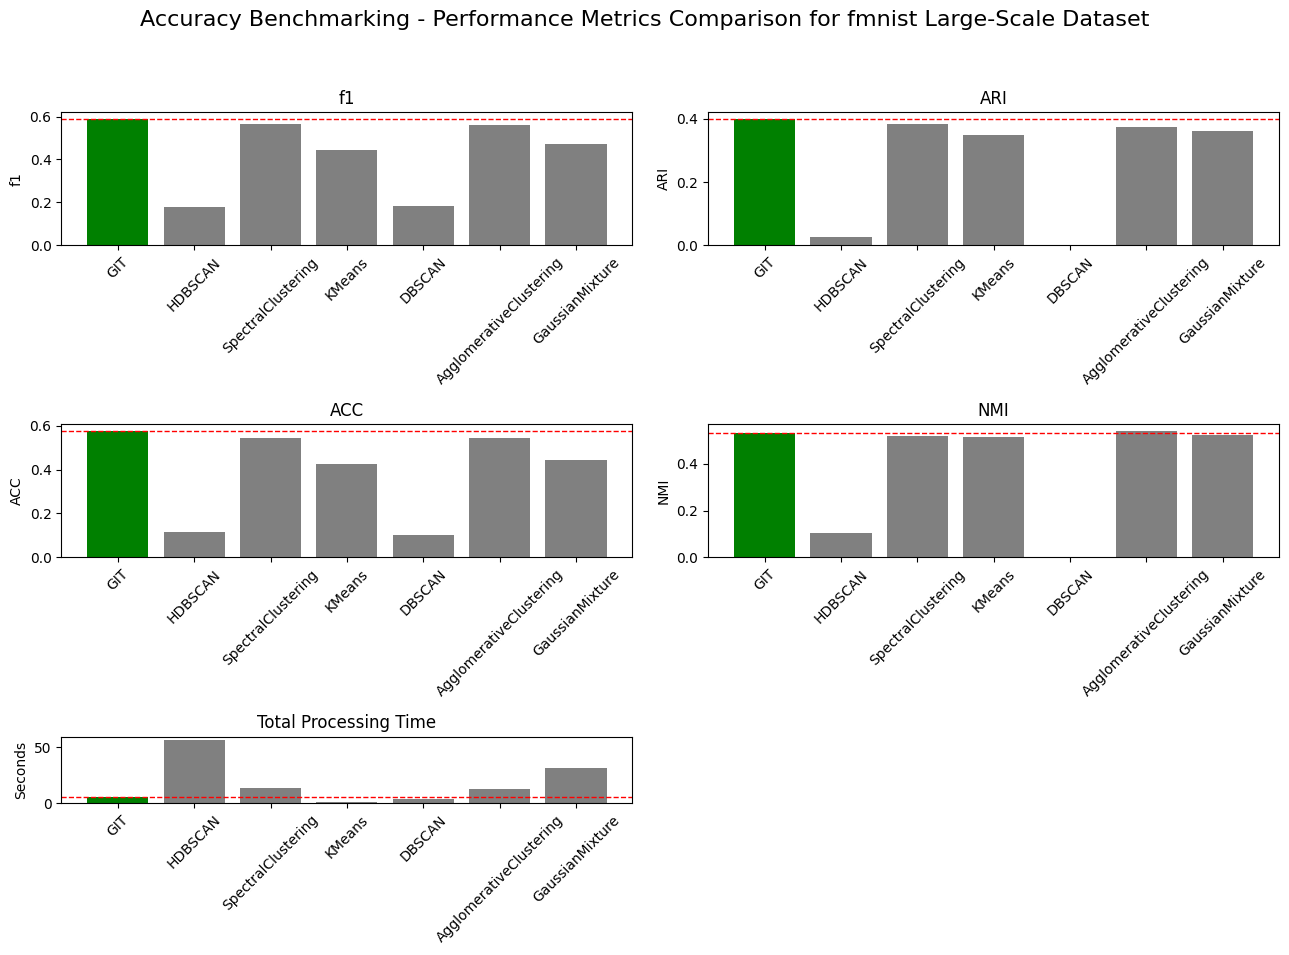

In [38]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_fmnist['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_fmnist[full_perf_metrics_fmnist['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_fmnist[full_perf_metrics_fmnist['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_fmnist['Algo'], full_perf_metrics_fmnist[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_fmnist['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_fmnist['Algo'], full_perf_metrics_fmnist['TotalProcessingTime'], 
            color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_fmnist['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `MNIST`</span></a></center>

### Load the Mnist data

In [39]:
# Load the Face dataset
X_mnist, Y_mnist_true = Real_DataLoader(name='mnist_784', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_mnist_true))
num_features = len(X_mnist[0])
total_rows = len(X_mnist)

# Calculate the balance rate
class_counts = Counter(Y_mnist_true)
smallest_class_proportion = min(class_counts.values()) / total_rows

# Print out the dataset characteristics including the balance rate
print(f"The 'mnist' Dataset has: {num_clusters} Classes, {num_features} Dimensions, {total_rows} Samples, and a Balance Rate of {smallest_class_proportion:.2f} per Class.")

The 'mnist' Dataset has: 10 Classes, 784 Dimensions, 60000 Samples, and a Balance Rate of 0.09 per Class.


### Take a small sample Mnist data ⚠ 

In [40]:
X_mnist, Y_mnist_true = get_balanced_subset(X_mnist, Y_mnist_true, subset_percentage=0.1)

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_mnist_true))
num_features = len(X_mnist[0])
total_rows = len(X_mnist)

# Print out the dataset characteristics
print(f"The 'Subset mnist' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'Subset mnist' Dataset has: 10 Clusters, 784 Features, and 6000 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [41]:
from git_cluster import GIT

In [42]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=3, target_ratio=[1 for i in range(10)])

# Apply the GIT algorithm to predict the clusters in the data
Y_mnist_pred_git = git.fit_predict(X_mnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_git, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_git, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_mnist = measures_calculator(X_mnist, Y_mnist_pred_git, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_mnist["Algo"] = git.__class__.__name__
perf_metrics_git_mnist["dataset"] = "mnist"
perf_metrics_git_mnist["TotalProcessingTime"] = processing_time

perf_metrics_git_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.539329,0.382438,0.516,0.490368,0.038427,1.0,10,GIT,mnist,15.817072


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [43]:
import hdbscan

In [44]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_mnist)

# Get the predicted Clusters
Y_mnist_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_hdbscan, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_hdbscan, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_mnist = measures_calculator(X_mnist, Y_mnist_pred_hdbscan, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_mnist["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_mnist["dataset"] = "mnist"
perf_metrics_hdbscan_mnist["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.182181,0.079771,0.242833,0.38747,0.038427,1.0,10,HDBSCAN,mnist,67.572717


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [45]:
from sklearn.cluster import SpectralClustering

In [46]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=10, assign_labels="discretize", 
                                         random_state=0, gamma=0.01, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_mnist)

# Get the predicted Clusters
Y_mnist_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_speclustr, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_speclustr, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_mnist = measures_calculator(X_mnist, Y_mnist_pred_speclustr, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_mnist["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_mnist["dataset"] = "mnist"
perf_metrics_speclustr_mnist["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.473838,0.346164,0.465667,0.459505,0.038427,1.0,10,SpectralClustering,mnist,7.208551


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [47]:
from sklearn.cluster import KMeans

In [48]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=10, random_state=2021)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_mnist)

# Get the predicted Clusters
Y_mnist_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_kmeans, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_kmeans, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_mnist = measures_calculator(X_mnist, Y_mnist_pred_kmeans, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_mnist["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_mnist["dataset"] = "mnist"
perf_metrics_kmeans_mnist["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.455274,0.35048,0.45,0.47929,0.038427,1.0,10,KMeans,mnist,0.250228


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=1)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_mnist_pred_dbscan = dbscan.fit_predict(X_mnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_dbscan, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_dbscan, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_mnist = measures_calculator(X_mnist, Y_mnist_pred_dbscan, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_mnist["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_mnist["dataset"] = "mnist"
perf_metrics_dbscan_mnist["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.181818,0.0,0.1,0.0,0.038427,1.0,10,DBSCAN,mnist,3.348325


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_mnist_pred_agg = agg_clustering.fit_predict(X_mnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_agg, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_agg, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_mnist = measures_calculator(X_mnist, Y_mnist_pred_agg, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_mnist["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_mnist["dataset"] = "mnist"
perf_metrics_agg_mnist["TotalProcessingTime"] = processing_time

perf_metrics_agg_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.593128,0.442548,0.5885,0.608165,0.038427,1.0,10,AgglomerativeClustering,mnist,9.022977


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [53]:
from sklearn.mixture import GaussianMixture

In [54]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=10, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_mnist)
Y_mnist_pred_gmm = gmm.predict(X_mnist)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_mnist_pred_gmm, Y_mnist_true = alignPredictedWithTrueLabels(Y_mnist_pred_gmm, Y_mnist_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_mnist = measures_calculator(X_mnist, Y_mnist_pred_gmm, Y_mnist_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_mnist["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_mnist["dataset"] = "mnist"
perf_metrics_gmm_mnist["TotalProcessingTime"] = processing_time

perf_metrics_gmm_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.590247,0.380836,0.594167,0.492355,0.038427,1.0,10,GaussianMixture,mnist,31.019041


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [55]:
full_perf_metrics_mnist = pd.concat([perf_metrics_git_mnist, 
                                      perf_metrics_hdbscan_mnist,
                                      perf_metrics_speclustr_mnist,
                                      perf_metrics_kmeans_mnist,
                                      perf_metrics_dbscan_mnist,
                                      perf_metrics_agg_mnist,
                                      perf_metrics_gmm_mnist], ignore_index=True)
full_perf_metrics_mnist

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.539329,0.382438,0.516000,0.490368,0.038427,1.0,10,GIT,mnist,15.817072
1,0.182181,0.079771,0.242833,0.387470,0.038427,1.0,10,HDBSCAN,mnist,67.572717
2,0.473838,0.346164,0.465667,0.459505,0.038427,1.0,10,SpectralClustering,mnist,7.208551
3,0.455274,0.350480,0.450000,0.479290,0.038427,1.0,10,KMeans,mnist,0.250228
4,0.181818,0.000000,0.100000,0.000000,0.038427,1.0,10,DBSCAN,mnist,3.348325
5,0.593128,0.442548,0.588500,0.608165,0.038427,1.0,10,AgglomerativeClustering,mnist,9.022977
6,0.590247,0.380836,0.594167,0.492355,0.038427,1.0,10,GaussianMixture,mnist,31.019041


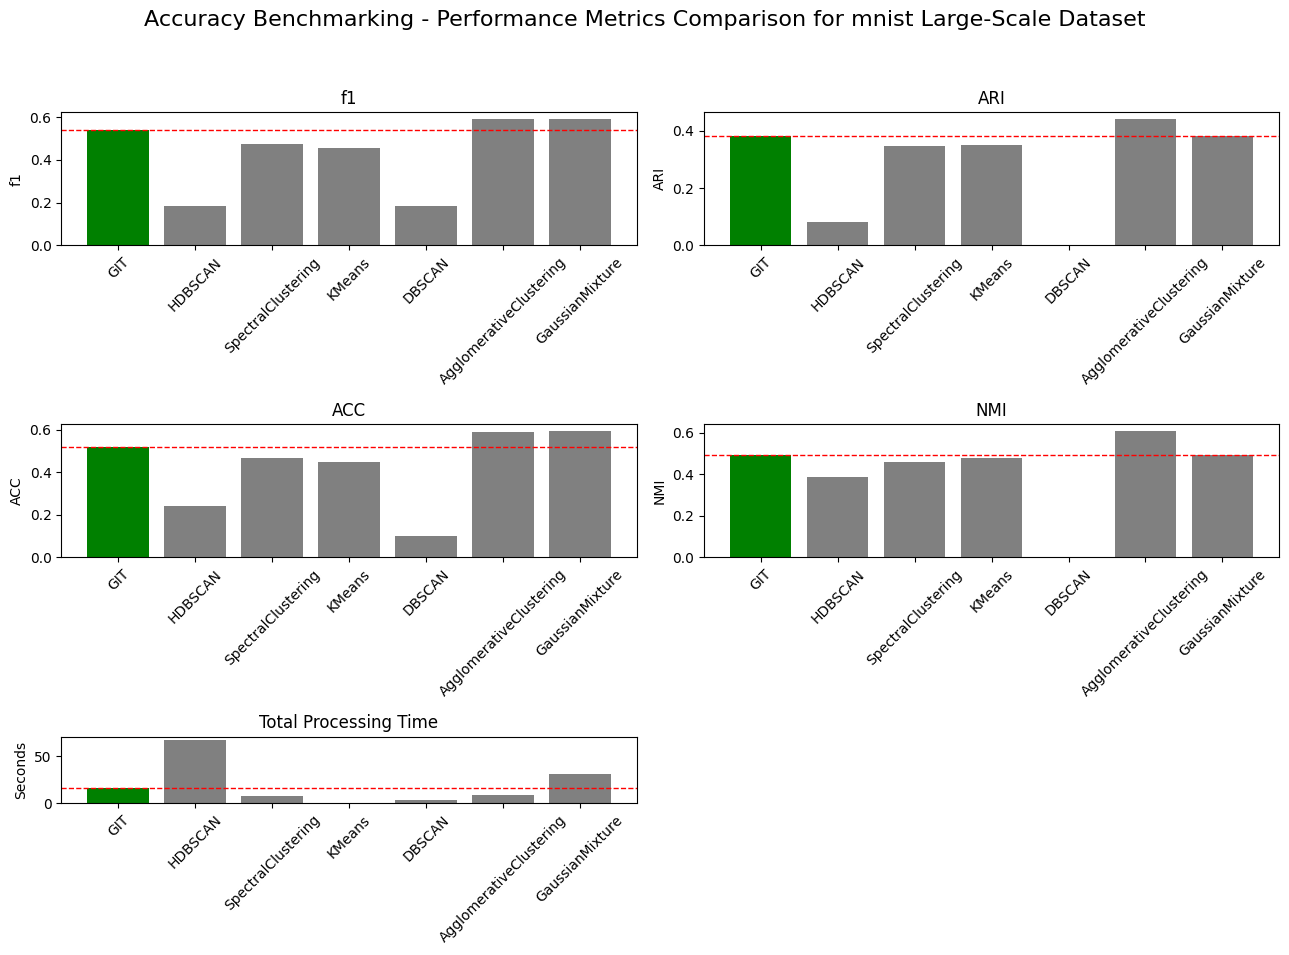

In [56]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_mnist['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_mnist[full_perf_metrics_mnist['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_mnist[full_perf_metrics_mnist['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_mnist['Algo'], full_perf_metrics_mnist[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_mnist['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_mnist['Algo'], full_perf_metrics_mnist['TotalProcessingTime'], 
            color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_mnist['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `Codon`</span></a></center>

### Load the `Codon` data

In [80]:
# Load the Codon dataset
X_codon, Y_codon_true = Real_DataLoader(name='codon', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_codon_true))
num_features = len(X_codon[0])
total_rows = len(X_codon)

# Calculate the balance rate
class_counts = Counter(Y_codon_true)
smallest_class_proportion = min(class_counts.values()) / total_rows

# Print out the dataset characteristics including the balance rate
print(f"The 'codon' Dataset has: {num_clusters} Classes, {num_features} Dimensions, {total_rows} Samples, and a Balance Rate of {smallest_class_proportion:.2f} per Class.")

The 'codon' Dataset has: 11 Classes, 65 Dimensions, 13028 Samples, and a Balance Rate of 0.00 per Class.


### Take a small sample Codon data ⚠ 

In [81]:
X_codon, Y_codon_true = get_balanced_subset(X_codon, Y_codon_true, subset_percentage=1)

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_codon_true))
num_features = len(X_codon[0])
total_rows = len(X_codon)

# Print out the dataset characteristics
print(f"The 'Subset codon' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'Subset codon' Dataset has: 11 Clusters, 65 Features, and 7251 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [82]:
from git_cluster import GIT

In [83]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=3, target_ratio=[1 for i in range(10)])

# Apply the GIT algorithm to predict the clusters in the data
Y_codon_pred_git = git.fit_predict(X_codon)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_git, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_git, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_codon = measures_calculator(X_codon, Y_codon_pred_git, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_codon["Algo"] = git.__class__.__name__
perf_metrics_git_codon["dataset"] = "codon"
perf_metrics_git_codon["TotalProcessingTime"] = processing_time

perf_metrics_git_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.219224,0.16686,0.253344,0.303275,-0.264048,1.0,11,GIT,codon,25.365531


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [84]:
import hdbscan

In [85]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_codon)

# Get the predicted Clusters
Y_codon_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_hdbscan, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_hdbscan, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_codon = measures_calculator(X_codon, Y_codon_pred_hdbscan, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_codon["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_codon["dataset"] = "codon"
perf_metrics_hdbscan_codon["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.092882,0.015701,0.107433,0.030378,-0.264048,1.0,11,HDBSCAN,codon,2.191746


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [64]:
from sklearn.cluster import SpectralClustering

In [66]:
# # Start the timer
# start_time = time.time()

# # Create an instance of the Spectral Clustering algorithm 
# spectral_clustering = SpectralClustering(n_clusters=10, assign_labels="discretize", 
#                                          random_state=0, gamma=0.01, affinity='rbf')

# # Apply the Spectral Clustering algorithm to predict the clusters in the data
# spectral_clustering.fit(X_codon)

# # Get the predicted Clusters
# Y_codon_pred_speclustr = spectral_clustering.labels_

# # Stop the timer and calculate the total processing time
# end_time = time.time()
# processing_time = end_time - start_time

# # Align the predicted labels with the true labels for accurate evaluation
# Y_codon_pred_speclustr, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_speclustr, Y_codon_true)

# # Calculate various clustering metrics to evaluate the performance
# perf_metrics_speclustr_codon = measures_calculator(X_codon, Y_codon_pred_speclustr, Y_codon_true)

# # Store additional information about the algorithm and dataset in the result
# perf_metrics_speclustr_codon["Algo"] = spectral_clustering.__class__.__name__
# perf_metrics_speclustr_codon["dataset"] = "codon"
# perf_metrics_speclustr_codon["TotalProcessingTime"] = processing_time

# perf_metrics_speclustr_codon

### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [67]:
from sklearn.cluster import KMeans

In [68]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=10, random_state=2021)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_codon)

# Get the predicted Clusters
Y_codon_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_kmeans, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_kmeans, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_codon = measures_calculator(X_codon, Y_codon_pred_kmeans, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_codon["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_codon["dataset"] = "codon"
perf_metrics_kmeans_codon["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.246208,0.021549,0.198664,0.08486,-0.301742,1.0,11,KMeans,codon,0.011862


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [69]:
from sklearn.cluster import DBSCAN

In [71]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=1)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_codon_pred_dbscan = dbscan.fit_predict(X_codon)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_dbscan, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_dbscan, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_codon = measures_calculator(X_codon, Y_codon_pred_dbscan, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_codon["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_codon["dataset"] = "codon"
perf_metrics_dbscan_codon["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.003323,0.000759,0.027546,0.055533,-0.301742,1.0,11,DBSCAN,codon,0.01


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=10)

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_codon_pred_agg = agg_clustering.fit_predict(X_codon)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_agg, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_agg, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_codon = measures_calculator(X_codon, Y_codon_pred_agg, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_codon["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_codon["dataset"] = "codon"
perf_metrics_agg_codon["TotalProcessingTime"] = processing_time

perf_metrics_agg_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.23289,0.016664,0.176962,0.07834,-0.301742,1.0,11,AgglomerativeClustering,codon,0.055744


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [74]:
from sklearn.mixture import GaussianMixture

In [75]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=10, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_codon)
Y_codon_pred_gmm = gmm.predict(X_codon)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_codon_pred_gmm, Y_codon_true = alignPredictedWithTrueLabels(Y_codon_pred_gmm, Y_codon_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_codon = measures_calculator(X_codon, Y_codon_pred_gmm, Y_codon_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_codon["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_codon["dataset"] = "codon"
perf_metrics_gmm_codon["TotalProcessingTime"] = processing_time

perf_metrics_gmm_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.321254,0.093689,0.232053,0.229819,-0.301742,1.0,11,GaussianMixture,codon,0.645684


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [78]:
full_perf_metrics_codon = pd.concat([perf_metrics_git_codon, 
                                      perf_metrics_hdbscan_codon,
                                      perf_metrics_kmeans_codon,
                                      perf_metrics_dbscan_codon,
                                      perf_metrics_agg_codon,
                                      perf_metrics_gmm_codon], ignore_index=True)
full_perf_metrics_codon

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.320162,0.178575,0.343907,0.381118,-0.301742,1.0,11,GIT,codon,0.533564
1,0.186817,0.019584,0.125209,0.051585,-0.301742,1.0,11,HDBSCAN,codon,0.117629
2,0.246208,0.021549,0.198664,0.084860,-0.301742,1.0,11,KMeans,codon,0.011862
3,0.003323,0.000759,0.027546,0.055533,-0.301742,1.0,11,DBSCAN,codon,0.010000
4,0.232890,0.016664,0.176962,0.078340,-0.301742,1.0,11,AgglomerativeClustering,codon,0.055744
5,0.321254,0.093689,0.232053,0.229819,-0.301742,1.0,11,GaussianMixture,codon,0.645684


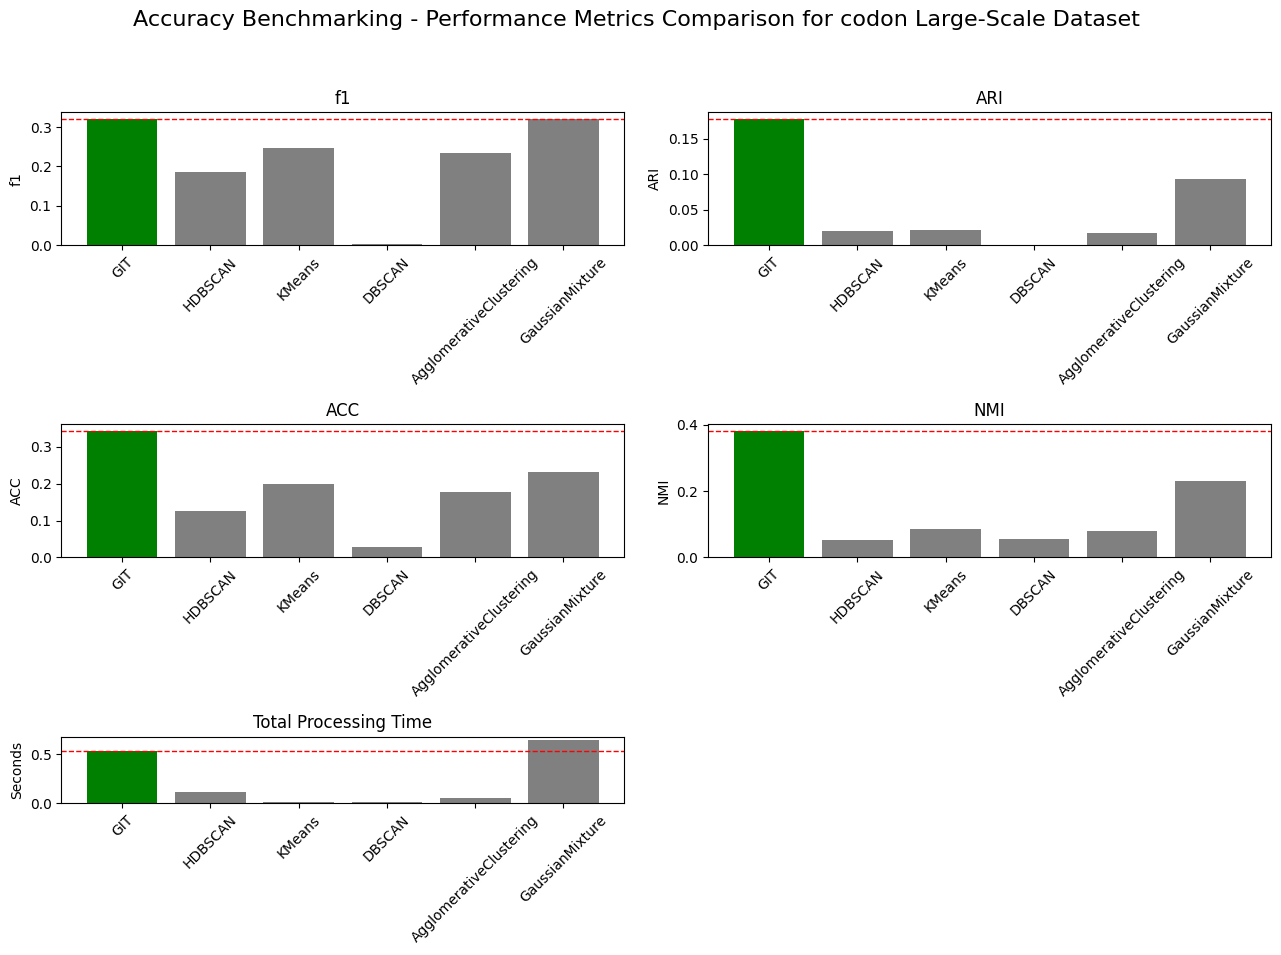

In [79]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_codon['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_codon[full_perf_metrics_codon['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_codon[full_perf_metrics_codon['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_codon['Algo'], full_perf_metrics_codon[metric], 
           color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_codon['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_codon['Algo'], full_perf_metrics_codon['TotalProcessingTime'], 
            color=['green' if x == benchmark_algo else 'grey' for x in full_perf_metrics_codon['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Large-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()